## Develop a logistic regression model that predicts dropout

### Preparation of the working environment

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [5]:
# Load data
filename = 'Deserción estudiantil.xlsx'
df = pd.read_excel(filename)
df.head()

,Marca temporal,Género,¿Cómo calificarías tu rendimiento estudiantil en la UNMSM hasta ahora?,¿Cómo calificarías tu nivel socioeconómico?,¿Cómo calificarías tu nivel de salud psicológica?,¿Qué tan frecuente es tu participación en programas de apoyo estudiantil (tutorías o programas de orientación académica)?,¿Qué tan frecuente tiene compromisos externos a la universidad?,¿Recibes apoyo y comprensión de tu familia en relación con tus estudios universitarios?,"¿Se siente estresado por la sobrecarga académica (tareas, practicas, etc.) ?",¿Tienes dificultades para aprender lo que te enseñan en la universidad?,¿Crees que las calificaciones son justas?,¿En el ultimo semestre has jalado más de 2 cursos?,¿Crees que tu ingreso familiar es el adecuado para solventar los gastos?,¿Crees que vives lejos de la universidad?,¿Has desertado de la universidad?
0,2024-02-24 15:02:43.832,Masculino,4,3,4,2,3,4,Si,No,Si,No,Si,Si,No
1,2024-02-24 15:03:46.286,Masculino,4,3,4,2,3,5,Si,Si,Si,No,Si,No,No
2,2024-02-24 15:58:16.689,Masculino,4,2,3,3,3,4,Si,No,No,No,No,No,No
3,2024-02-24 16:02:46.593,Femenino,4,3,3,3,2,3,Si,Si,No,No,No,No,No
4,2024-02-24 16:06:01.006,Masculino,3,3,4,2,3,4,Si,No,No,No,Si,Si,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype         
---  ------                                                                                                                     --------------  -----         
 0   Marca temporal                                                                                                             55 non-null     datetime64[ns]
 1   Género                                                                                                                     55 non-null     object        
 2   ¿Cómo calificarías tu rendimiento estudiantil en la UNMSM hasta ahora?                                                     55 non-null     int64         
 3   ¿Cómo calificarías tu nivel socioeconómico?                                                      

## Some stadistics about the data

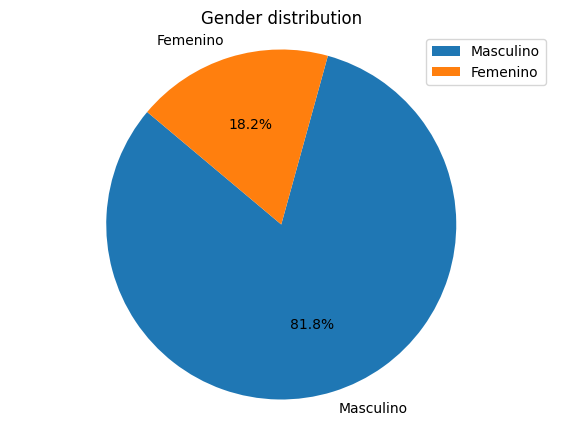

In [7]:
# Count ocurrency of each element
gender_count = df['Género'].value_counts()

# Create the graphic and its features
plt.figure(figsize=(7,5 ))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender distribution')
plt.axis('equal')
plt.legend(gender_count.index, loc='upper right')
plt.show()

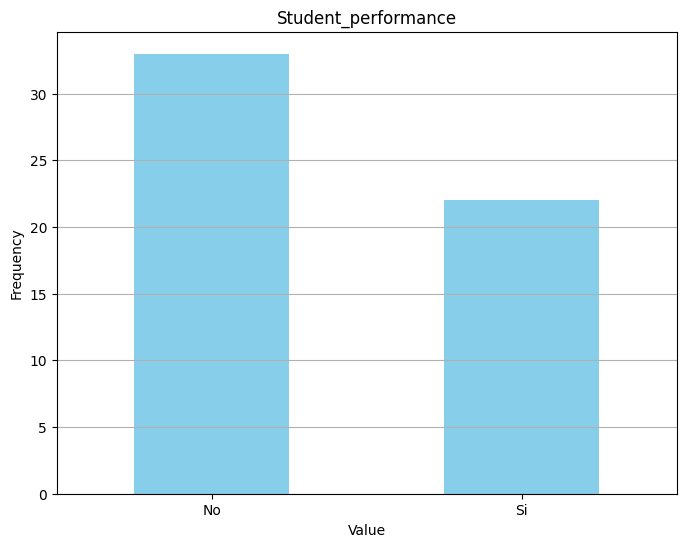

In [8]:
# Calculate the frequency of the column
frequency_values = df['¿Tienes dificultades para aprender lo que te enseñan en la universidad? '].value_counts()

# Define the bar chart
plt.figure(figsize=(8, 6))
frequency_values.plot(kind='bar', color='skyblue')
plt.title('Student_performance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

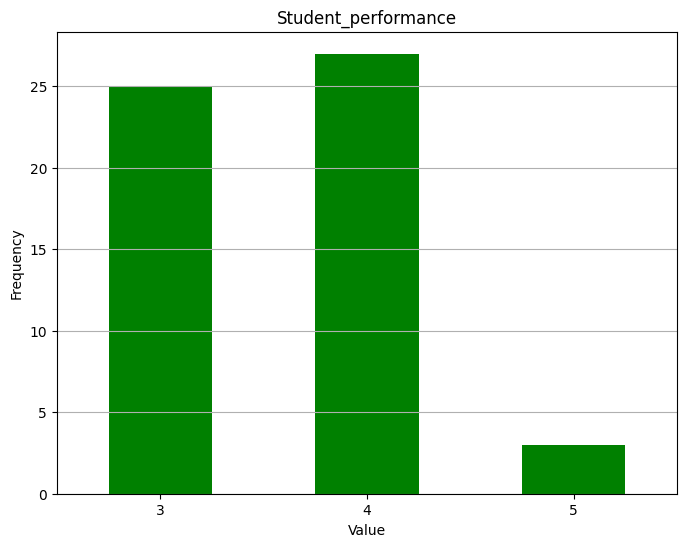

In [9]:
# Calculate the frequency of the column
frequency_values = df['¿Cómo calificarías tu rendimiento estudiantil en la UNMSM hasta ahora? '].value_counts()
frequency_values = frequency_values.sort_index()

# Define the bar chart
plt.figure(figsize=(8, 6))
frequency_values.plot(kind='bar', color='green')
plt.title('Student_performance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

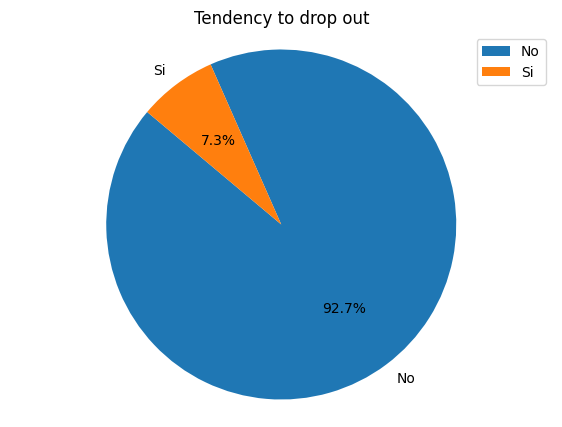

In [10]:
# Count ocurrency of each element
gender_count = df['¿Has desertado de la universidad?'].value_counts()

# Create the graphic and its features
plt.figure(figsize=(7,5 ))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Tendency to drop out')
plt.axis('equal')
plt.legend(gender_count.index, loc='upper right')
plt.show()